### Notebook 5 of Capstone Project: Modelling Using Linear Regression!

The goal of this notebook is to test correlations of features to daily seismicity.

In [1]:
#the standard usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('oil_and_gas_data/data_for_modelling/data_ready_for_modelling.csv', index_col=0)

In [3]:
data.index = pd.to_datetime(data.index)
data = data.loc['1-1-2018':'4-1-2019',]

In [4]:
data

,Daily_Avg,Daily_Sum,Daily_Count,Dly_Cnt_Diff,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft
2018-01-01,0.0,0.0,0,0.0,29.0,60.46,66.73,11.0,9.756934e+06,2296.189464
2018-01-02,0.0,0.0,0,0.0,29.0,60.37,66.65,10.0,9.153045e+06,2342.811706
2018-01-03,1.9,1.9,1,1.0,29.0,61.61,67.85,9.0,8.132097e+06,2237.885860
2018-01-04,0.0,0.0,0,-1.0,29.0,61.98,68.73,9.0,8.132097e+06,2237.885860
2018-01-05,0.0,0.0,0,0.0,29.0,61.49,68.01,11.0,1.037330e+07,2351.808369
...,...,...,...,...,...,...,...,...,...,...
2019-03-28,0.0,0.0,0,0.0,32.0,59.29,66.08,23.0,1.861699e+07,2614.097670
2019-03-29,0.0,0.0,0,0.0,32.0,60.19,67.93,26.0,2.113339e+07,2556.464154
2019-03-30,1.7,1.7,1,1.0,31.0,60.19,67.93,25.0,2.095261e+07,2508.160674
2019-03-31,1.4,1.4,1,0.0,31.0,60.19,67.93,25.0,1.823890e+07,2658.873856


In [5]:
#my training set is going to be for date range 1/1/2018-12/31/2018 and test will be for 1/1/2019-4/1/2019
data_train = data.loc['1-1-2018':'1-1-2019',]
data_test = data.loc['1-1-2019':,]

In [6]:
#I'm also going to not use the index as a date time column for this exercise. I'm going
#to set that as its own column and then reset the index
data_train['Date'] = data_train.index
data_test['Date'] = data_test.index
data_train.reset_index(inplace=True)
data_test.reset_index(inplace=True)
data_train.drop('index', axis=1, inplace=True)
data_test.drop('index', axis=1, inplace=True)

<ipython-input-6-7297e0ade6ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Date'] = data_train.index
<ipython-input-6-7297e0ade6ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Date'] = data_test.index
/Users/melissamcmillan/opt/anaconda3/envs/timer/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [7]:
X_train = data_train[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y_train = data_train['Daily_Sum']
X_test = data_test[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y_test = data_test['Daily_Sum']

In [8]:
def evaluate_model(x, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared = False)
    print(f'r2 = {r2}')
    print(f'rmse = {rmse}')

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
#I need to make a null model
mean_y_train_array = np.full_like(y_train, y_train.mean())
mean_y_test_array = np.full_like(y_test, y_test.mean())

In [11]:
#rmse will be null for train set
mean_squared_error(y_train, mean_y_train_array, squared = False)

2.7565273165533752

In [12]:
#rmse will be null for test set
mean_squared_error(y_test, mean_y_test_array, squared = False)

2.402892432470482

In [13]:
#now make predictions for train data from the model
y_train_pred = lr.predict(X_train)
evaluate_model(X_train, y_train, y_train_pred)

r2 = 0.010168356778792909
rmse = 2.742476831091624


In [14]:
#now make predictions for test data from the model
y_test_pred = lr.predict(X_test)
evaluate_model(X_test, y_test, y_test_pred)

r2 = -0.03495338537497439
rmse = 2.4445263581483982


Well those results aren't so great. I'm going to try using just the injection per ft feature.

In [15]:
X_train = data_train[['avg_volh2o_per_ft']]
y_train = data_train['Daily_Sum']
X_test = data_test[['avg_volh2o_per_ft']]
y_test = data_test['Daily_Sum']

In [16]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [17]:
#now make predictions for train data from the model
y_train_pred = lr2.predict(X_train)
evaluate_model(X_train, y_train, y_train_pred)

r2 = 0.0076553867446967905
rmse = 2.7459559042807697


In [18]:
#now make predictions for train data from the model
y_test_pred = lr2.predict(X_test)
evaluate_model(X_test, y_test, y_test_pred)

r2 = -0.07341475586134605
rmse = 2.4895342770604434


Well that didn't improve much at all.

In [19]:
test_df = data[['Daily_Sum','fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]

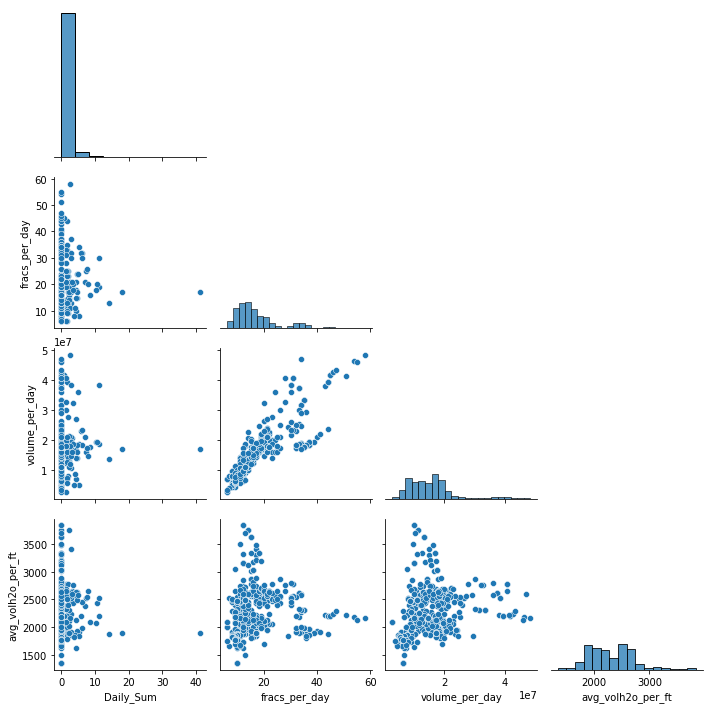

In [20]:
sns.pairplot(test_df, corner = True);

In [21]:
test_df = test_df[test_df['Daily_Sum'] != 0]

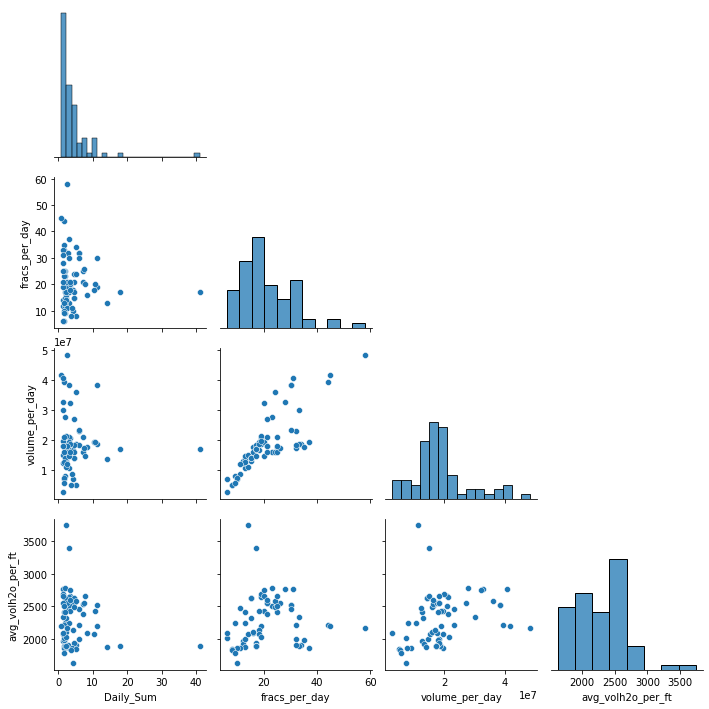

In [22]:
sns.pairplot(test_df, corner = True);

Now I'm going to run Linear Regression the Fasola data as see how that differs.

In [64]:
fasola = pd.read_csv('oil_and_gas_data/data_for_modelling/fasola_data_ready_for_modelling.csv', index_col=0)

In [65]:
fasola

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2016-01-01,0.0,0.0,0,33.0,37.13,36.61,9.0,5.080098e+06,1088.829502,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-02,0.0,0.0,0,33.0,37.13,36.61,11.0,5.892634e+06,1044.749861,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-03,0.0,0.0,0,33.0,37.13,36.61,9.0,4.539134e+06,1125.551135,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-04,0.0,0.0,0,33.0,36.81,36.28,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-05,0.0,0.0,0,33.0,35.97,35.56,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
...,...,...,...,...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0,52.26,54.87,NaN,NaN,NaN,NaN
2021-01-29,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-30,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-31,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN


In [66]:
#I'm going to use a wide range here
fasola.index = pd.to_datetime(fasola.index)

In [67]:
fasola

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2016-01-01,0.0,0.0,0,33.0,37.13,36.61,9.0,5.080098e+06,1088.829502,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-02,0.0,0.0,0,33.0,37.13,36.61,11.0,5.892634e+06,1044.749861,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-03,0.0,0.0,0,33.0,37.13,36.61,9.0,4.539134e+06,1125.551135,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-04,0.0,0.0,0,33.0,36.81,36.28,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-05,0.0,0.0,0,33.0,35.97,35.56,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
...,...,...,...,...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0,52.26,54.87,NaN,NaN,NaN,NaN
2021-01-29,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-30,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-31,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN


In [68]:
#my training set is going to be for date range 1/1/2018-12/31/2018 and test will be for 1/1/2019-4/1/2019
fas_train = fasola.loc['1-1-2018':'12-31-2018',]
fas_test = fasola.loc['1-1-2019':'4-1-2019',]

In [31]:
#I'm also going to not use the index as a date time column for this exercise. I'm going
#to set that as its own column and then reset the index
fas_train['Date'] = fas_train.index
fas_test['Date'] = fas_test.index
fas_train.reset_index(inplace=True)
fas_test.reset_index(inplace=True)
fas_train.drop('index', axis=1, inplace=True)
fas_test.drop('index', axis=1, inplace=True)

<ipython-input-31-5397367e776c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fas_train['Date'] = fas_train.index
<ipython-input-31-5397367e776c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fas_test['Date'] = fas_test.index
/Users/melissamcmillan/opt/anaconda3/envs/timer/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [32]:
X_train = fas_train[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y_train = fas_train['Daily_Sum']
X_test = fas_test[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y_test = fas_test['Daily_Sum']

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
#I need to make a null model
mean_y_train_array = np.full_like(y_train, y_train.mean())
mean_y_test_array = np.full_like(y_test, y_test.mean())

In [35]:
#rmse will be null for train set
mean_squared_error(y_train, mean_y_train_array, squared = False)

9.081649965713828

In [36]:
#rmse will be null for test set
mean_squared_error(y_test, mean_y_test_array, squared = False)

2.402892432470482

In [37]:
#now make predictions for train data from the model
y_train_pred = lr.predict(X_train)
evaluate_model(X_train, y_train, y_train_pred)

r2 = 0.008174426678346891
rmse = 9.044455157297817


In [38]:
#now make predictions for test data from the model
y_test_pred = lr.predict(X_test)
evaluate_model(X_test, y_test, y_test_pred)

r2 = -0.5016417851687174
rmse = 2.944540295760314


In [39]:
test_df = fasola[['Daily_Sum','fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]

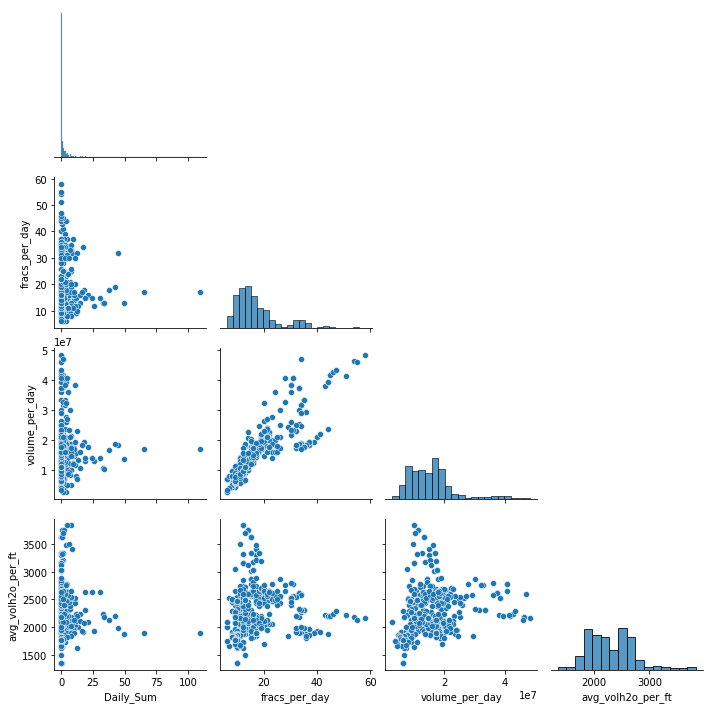

In [40]:
sns.pairplot(test_df, corner = True);

In [69]:
#again, these do not look good. I wonder if it's my time range. I'm going to try that.
fasola2 = fasola.loc['4-1-2017':'1-31-2020',]

In [70]:
fasola2

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2017-04-01,0.000000,0.000000,0,32.0,50.54,52.20,16.0,1.161522e+07,1688.148260,"[42255348920000, 42255348880000, 4225534887000..."
2017-04-02,0.525577,0.525577,1,32.0,50.54,52.20,18.0,1.282951e+07,1647.239205,"[42255348920000, 42255348880000, 4225534887000..."
2017-04-03,0.000000,0.000000,0,32.0,50.25,52.04,14.0,1.098515e+07,1768.567397,"[42255352780000, 42255352810000, 4225535282000..."
2017-04-04,0.740810,0.740810,1,32.0,50.99,53.08,13.0,1.015108e+07,1770.947436,"[42255352780000, 42255352810000, 4225535282000..."
2017-04-05,0.000000,0.000000,0,32.0,51.14,53.41,11.0,8.490292e+06,1721.203891,"[42255352780000, 42255352800000, 4225535279000..."
...,...,...,...,...,...,...,...,...,...,...
2020-01-27,0.000000,0.000000,0,33.0,53.09,58.54,45.0,4.278683e+07,1642.821249,"[42255361860000, 42255361850000, 4225536569000..."
2020-01-28,1.900000,1.900000,1,33.0,53.33,59.37,46.0,4.433917e+07,1658.283946,"[42255361860000, 42255361850000, 4225536569000..."
2020-01-29,0.000000,0.000000,0,33.0,53.29,59.46,44.0,4.293038e+07,1624.508496,"[42255361860000, 42255361850000, 4225536569000..."
2020-01-30,0.000000,0.000000,0,33.0,52.19,57.72,46.0,4.500210e+07,1624.812672,"[42255361860000, 42255361850000, 4225536556000..."


In [71]:
#my training set is going to be for date range 1/1/2018-12/31/2018 and test will be for 1/1/2019-4/1/2019
fas2_train = fasola2.loc['4-1-2017':'9-30-2019',]
fas2_test = fasola2.loc['10-1-2019':,]

In [72]:
#I'm also going to not use the index as a date time column for this exercise. I'm going
#to set that as its own column and then reset the index
fas2_train['Date'] = fas2_train.index
fas2_test['Date'] = fas2_test.index
fas2_train.reset_index(inplace=True)
fas2_test.reset_index(inplace=True)
fas2_train.drop('index', axis=1, inplace=True)
fas2_test.drop('index', axis=1, inplace=True)

<ipython-input-72-b67aeb869573>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fas2_train['Date'] = fas2_train.index
<ipython-input-72-b67aeb869573>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fas2_test['Date'] = fas2_test.index
/Users/melissamcmillan/opt/anaconda3/envs/timer/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [73]:
X_train = fas2_train[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y_train = fas2_train['Daily_Sum']
X_test = fas2_test[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y_test = fas2_test['Daily_Sum']

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
#I need to make a null model
mean_y_train_array = np.full_like(y_train, y_train.mean())
mean_y_test_array = np.full_like(y_test, y_test.mean())

In [76]:
#rmse will be null for train set
mean_squared_error(y_train, mean_y_train_array, squared = False)

6.242931962426201

In [77]:
#rmse will be null for test set
mean_squared_error(y_test, mean_y_test_array, squared = False)

1.1968252891246136

In [78]:
#now make predictions for train data from the model
y_train_pred = lr.predict(X_train)
evaluate_model(X_train, y_train, y_train_pred)

r2 = 0.011991047921596554
rmse = 6.205389431270401


In [79]:
#now make predictions for test data from the model
y_test_pred = lr.predict(X_test)
evaluate_model(X_test, y_test, y_test_pred)

r2 = -1.4236298218952692
rmse = 1.8632189869402804


In [122]:
test_df = fasola2[['Daily_Sum','fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]

In [123]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2017-04-01 to 2020-01-31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Daily_Sum          1036 non-null   float64
 1   fracs_per_day      1036 non-null   float64
 2   volume_per_day     1036 non-null   float64
 3   avg_volh2o_per_ft  1036 non-null   float64
dtypes: float64(4)
memory usage: 80.5 KB


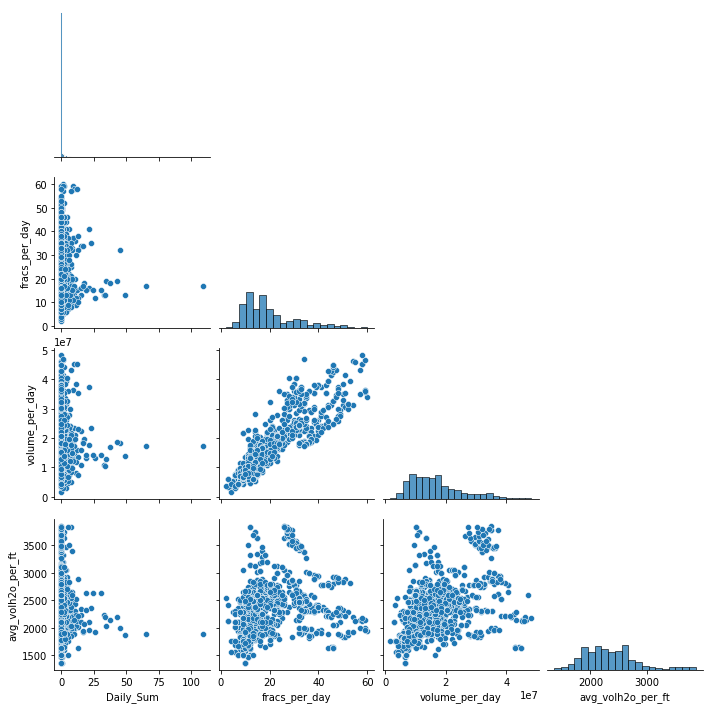

In [81]:
sns.pairplot(test_df, corner = True);

In [82]:
test_df2 = test_df[test_df['Daily_Sum'] != 0]

In [83]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322 entries, 2017-04-02 to 2020-01-28
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Daily_Sum          322 non-null    float64
 1   fracs_per_day      322 non-null    float64
 2   volume_per_day     322 non-null    float64
 3   avg_volh2o_per_ft  322 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


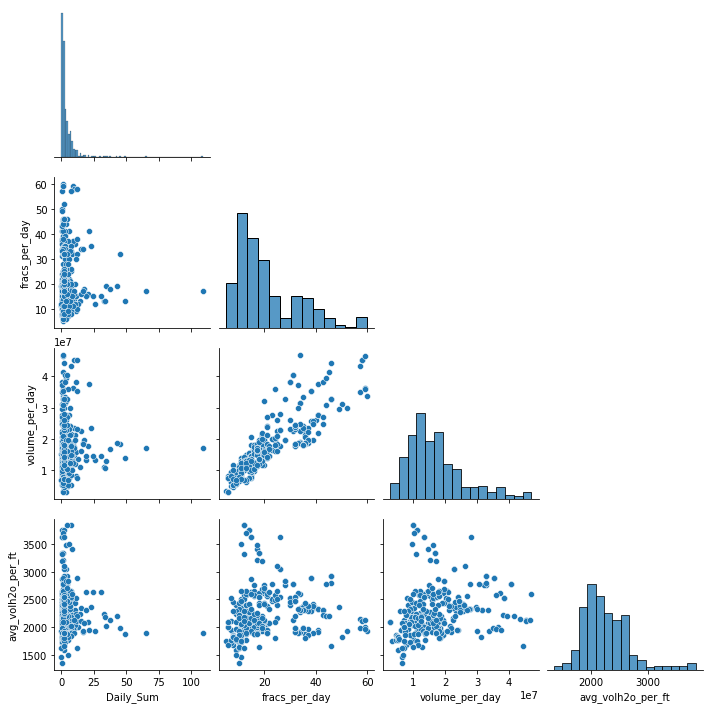

In [84]:
sns.pairplot(test_df2, corner = True);

In [85]:
fasola

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2016-01-01,0.0,0.0,0,33.0,37.13,36.61,9.0,5.080098e+06,1088.829502,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-02,0.0,0.0,0,33.0,37.13,36.61,11.0,5.892634e+06,1044.749861,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-03,0.0,0.0,0,33.0,37.13,36.61,9.0,4.539134e+06,1125.551135,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-04,0.0,0.0,0,33.0,36.81,36.28,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
2016-01-05,0.0,0.0,0,33.0,35.97,35.56,26.0,1.135010e+07,848.112281,"[42255346090000, 42255346080000, 4225534610000..."
...,...,...,...,...,...,...,...,...,...,...
2021-01-28,0.0,0.0,0,12.0,52.26,54.87,NaN,NaN,NaN,NaN
2021-01-29,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-30,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN
2021-01-31,0.0,0.0,0,12.0,52.16,55.25,NaN,NaN,NaN,NaN


<AxesSubplot:>

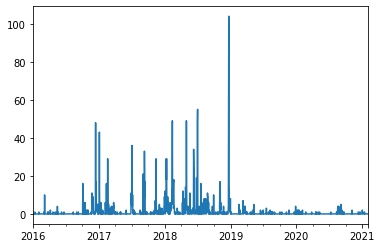

In [86]:
fasola['Daily_Count'].plot()

<AxesSubplot:>

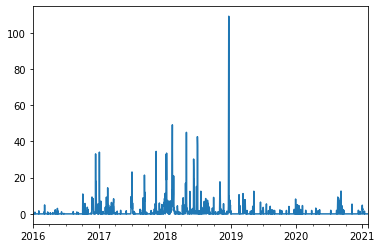

In [87]:
fasola['Daily_Sum'].plot()

I wonder if I resample to weekly if I get any better results.

In [89]:
fasola_weekly = fasola.resample('W').mean()
fasola_weekly

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft
2016-01-03,0.000000,0.000000,0.000000,33.000000,37.130000,36.610000,9.666667,5.170622e+06,1086.376832
2016-01-10,0.000000,0.000000,0.000000,33.000000,34.234286,33.472857,26.571429,1.235401e+07,825.894278
2016-01-17,0.136829,0.136829,0.142857,33.000000,30.261429,29.014286,24.285714,1.620145e+07,1014.034459
2016-01-24,0.000000,0.000000,0.000000,33.000000,30.051429,28.528571,87.571429,7.169845e+07,1488.242188
2016-01-31,0.000000,0.000000,0.000000,33.571429,32.337143,32.145714,35.714286,2.944738e+07,1148.266959
...,...,...,...,...,...,...,...,...,...
2021-01-10,0.000000,0.000000,0.000000,11.000000,50.678571,53.937143,NaN,NaN,NaN
2021-01-17,0.214286,0.214286,0.142857,11.000000,52.608571,55.214286,NaN,NaN,NaN
2021-01-24,0.000000,0.000000,0.000000,11.285714,52.588571,55.227143,NaN,NaN,NaN
2021-01-31,0.000000,0.000000,0.000000,12.000000,52.420000,55.198571,NaN,NaN,NaN


In [99]:
fasola_weekly.tail(20)

,Daily_Avg,Daily_Sum,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft
2020-09-27,0.528571,0.528571,0.285714,8.000000,39.860000,40.895714,6.142857,8.188620e+06,2346.492950
2020-10-04,0.000000,0.000000,0.000000,8.285714,38.394286,39.424286,6.000000,7.095686e+06,2679.670861
2020-10-11,0.000000,0.000000,0.000000,9.571429,40.260000,41.222857,5.571429,4.898786e+06,2980.053485
2020-10-18,0.000000,0.000000,0.000000,11.000000,40.435714,41.325714,5.000000,4.313777e+06,2864.981524
2020-10-25,0.000000,0.000000,0.000000,11.000000,40.227143,40.915714,6.285714,5.794101e+06,2712.556536
2020-11-01,0.000000,0.000000,0.000000,11.285714,36.837143,37.455714,6.857143,6.359969e+06,2184.051082
2020-11-08,0.385714,0.771429,0.285714,12.285714,37.497143,38.477143,5.714286,6.693523e+06,2781.003324
2020-11-15,0.000000,0.000000,0.000000,12.714286,40.450000,41.767143,5.285714,6.832814e+06,2949.377840
2020-11-22,0.000000,0.000000,0.000000,12.000000,41.651429,43.231429,4.714286,5.706328e+06,2314.419138
2020-11-29,0.000000,0.000000,0.000000,11.000000,45.074286,46.555714,4.142857,5.781034e+06,2602.904945


In [109]:
#set the widest date range
fas_train_weekly = fasola_weekly.loc['1-3-2016':'12-31-2018',]
fas_test_weekly = fasola_weekly.loc['1-1-2019':'11-29-2020',]

In [112]:
fas_test_weekly.dropna(inplace=True)

<ipython-input-112-a1b7761cfd11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fas_test_weekly.dropna(inplace=True)


In [113]:
fas_test_weekly.isna().sum()

Daily_Avg            0
Daily_Sum            0
Daily_Count          0
Rig_Count            0
WTI_Spot_Price       0
Brent_Spot_Price     0
fracs_per_day        0
volume_per_day       0
avg_volh2o_per_ft    0
dtype: int64

In [114]:
fas_train_weekly['Date'] = fas_train_weekly.index
fas_test_weekly['Date'] = fas_test_weekly.index
fas_train_weekly.reset_index(inplace=True)
fas_test_weekly.reset_index(inplace=True)
fas_train_weekly.drop('index', axis=1, inplace=True)
fas_test_weekly.drop('index', axis=1, inplace=True)

<ipython-input-114-cc99cd5a7be4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fas_train_weekly['Date'] = fas_train_weekly.index
<ipython-input-114-cc99cd5a7be4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fas_test_weekly['Date'] = fas_test_weekly.index
/Users/melissamcmillan/opt/anaconda3/envs/timer/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [115]:
X_train = fas_train_weekly[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y_train = fas_train_weekly['Daily_Sum']
X_test = fas_test_weekly[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y_test = fas_test_weekly['Daily_Sum']

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
#I need to make a null model
mean_y_train_array = np.full_like(y_train, y_train.mean())
mean_y_test_array = np.full_like(y_test, y_test.mean())

In [118]:
#rmse will be null for train set
mean_squared_error(y_train, mean_y_train_array, squared = False)

3.3397421367588382

In [119]:
#rmse will be null for test set
mean_squared_error(y_test, mean_y_test_array, squared = False)

0.9560072929592038

In [120]:
#now make predictions for train data from the model
y_train_pred = lr.predict(X_train)
evaluate_model(X_train, y_train, y_train_pred)

r2 = 0.03666597869812527
rmse = 3.2779429073365196


In [121]:
#now make predictions for test data from the model
y_test_pred = lr.predict(X_test)
evaluate_model(X_test, y_test, y_test_pred)

r2 = -4.6291190881258055
rmse = 2.268200404822756


Now I'd like to model my mega dataset and see if the results differ at all.

In [124]:
mega_df = pd.read_csv('oil_and_gas_data/data_for_modelling/mega_data_ready_for_modelling.csv', index_col=0)

In [125]:
#first thing to do is drop na values
mega_df = mega_df.dropna()
mega_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2863 entries, 2012-03-02 to 2020-12-05
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Daily_Sum          2863 non-null   float64
 1   Daily_Avg          2863 non-null   float64
 2   Daily_Count        2863 non-null   int64  
 3   Rig_Count          2863 non-null   float64
 4   WTI_Spot_Price     2863 non-null   float64
 5   Brent_Spot_Price   2863 non-null   float64
 6   fracs_per_day      2863 non-null   float64
 7   volume_per_day     2863 non-null   float64
 8   avg_volh2o_per_ft  2863 non-null   float64
 9   APIs               2863 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 246.0+ KB


In [126]:
mega_df.index = pd.to_datetime(mega_df.index)
mega_df = mega_df.loc[:'1-31-2020',]
mega_df.tail()

,Daily_Sum,Daily_Avg,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2020-01-27,0.0,0.0,0,33.0,53.09,58.54,45.0,4.278683e+07,1642.821249,"[42255361850000, 42255361860000, 4225536568000..."
2020-01-28,1.9,1.9,1,33.0,53.33,59.37,46.0,4.433917e+07,1658.283946,"[42255361850000, 42255361860000, 4225536568000..."
2020-01-29,0.0,0.0,0,33.0,53.29,59.46,44.0,4.293038e+07,1624.508496,"[42255361850000, 42255361860000, 4225536569000..."
2020-01-30,0.0,0.0,0,33.0,52.19,57.72,46.0,4.500210e+07,1624.812672,"[42255361850000, 42255361860000, 4225536559000..."
2020-01-31,0.0,0.0,0,33.0,51.58,57.77,46.0,4.500210e+07,1624.812672,"[42255361850000, 42255361860000, 4225536559000..."


In [127]:
#time to resample to Weekly averages
mega_df_weekly = mega_df.resample('W').mean()
mega_df_weekly.dropna(inplace=True)
mega_df_weekly.head()

,Daily_Sum,Daily_Avg,Daily_Count,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft
2012-03-04,0.0,0.0,0.0,101.000000,106.680000,125.930000,8.0,6.358212e+06,602.103409
2012-03-11,0.0,0.0,0.0,101.000000,105.705000,125.855000,8.0,6.358212e+06,602.103409
2012-03-25,0.0,0.0,0.0,101.000000,106.430000,125.210000,1.0,9.870840e+05,373.895455
2012-04-01,0.0,0.0,0.0,101.000000,107.070000,125.850000,1.0,9.870840e+05,373.895455
2012-06-03,0.0,0.0,0.0,98.666667,85.761667,101.858333,1.0,8.432639e+05,1117.963447


In [150]:
X = mega_df_weekly[['fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]
y = mega_df_weekly['Daily_Avg']

In [151]:
#splitting into train and test sets; remember to use shuffle=False
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [152]:
X_train.head(2)

,fracs_per_day,volume_per_day,avg_volh2o_per_ft
2012-03-04,8.0,6358212.0,602.103409
2012-03-11,8.0,6358212.0,602.103409


In [153]:
X_train.shape

(289, 3)

In [154]:
y_train.shape

(289,)

In [155]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [156]:
#I need to make a null model
mean_y_train_array = np.full_like(y_train, y_train.mean())
mean_y_test_array = np.full_like(y_test, y_test.mean())

In [157]:
#rmse will be null for train set
mean_squared_error(y_train, mean_y_train_array, squared = False)

0.24662795519027217

In [158]:
#rmse will be null for test set
mean_squared_error(y_test, mean_y_test_array, squared = False)

0.3379607320070323

In [159]:
#now make predictions for train data from the model
y_train_pred = lr.predict(X_train)
evaluate_model(X_train, y_train, y_train_pred)

r2 = 0.2320421709881103
rmse = 0.21612797693733687


In [160]:
#now make predictions for test data from the model
y_test_pred = lr.predict(X_test)
evaluate_model(X_test, y_test, y_test_pred)

r2 = -0.19415825124777664
rmse = 0.3693152013811405


In [161]:
test_df = mega_df_weekly[['Daily_Avg','fracs_per_day', 'volume_per_day', 'avg_volh2o_per_ft']]

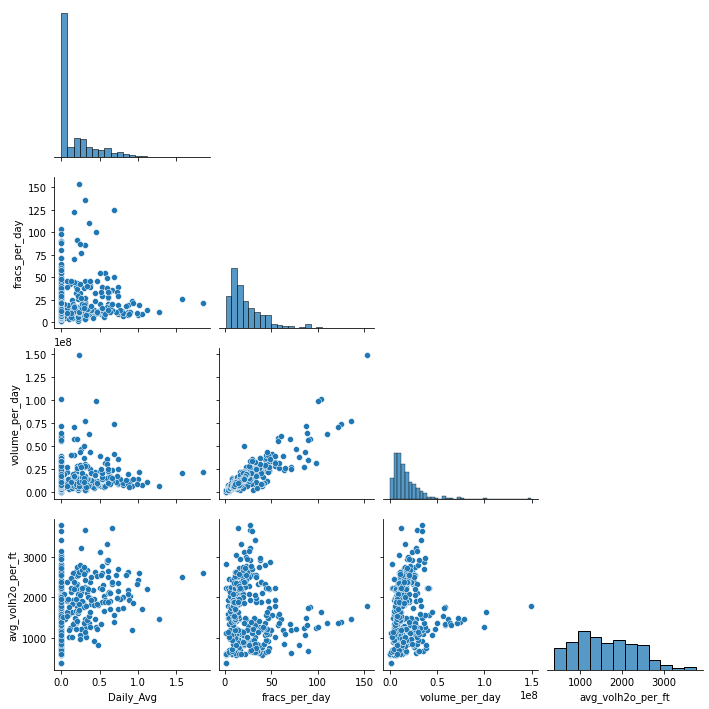

In [162]:
sns.pairplot(test_df, corner = True);

In [163]:
test_df2 = test_df[test_df['Daily_Avg'] != 0]

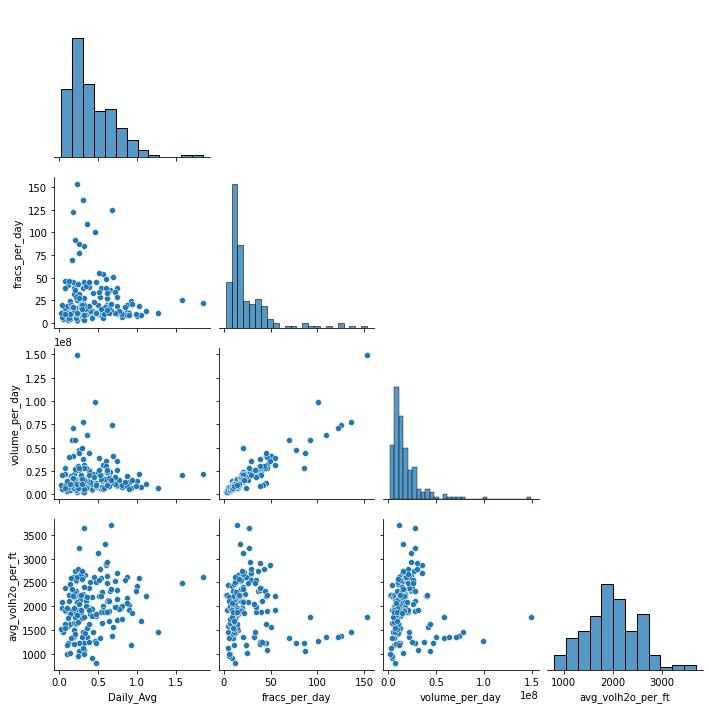

In [164]:
sns.pairplot(test_df2, corner = True);